In [20]:
import pandas as pd
house_rent_data = pd.read_csv('House_Rent_Dataset.csv')
house_rent_data.head(10)



,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


Kode ini membaca file CSV bernama House_Rent_Dataset.csv menggunakan Pandas, lalu menampilkan 10 baris pertama dari dataset untuk melihat isinya.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8389 - loss: 0.5394 - val_accuracy: 0.9555 - val_loss: 0.1468
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9545 - loss: 0.1476 - val_accuracy: 0.9657 - val_loss: 0.1114
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9634 - loss: 0.1169 - val_accuracy: 0.9688 - val_loss: 0.0999
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9700 - loss: 0.0944 - val_accuracy: 0.9732 - val_loss: 0.0922
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9762 - loss: 0.0772 - val_accuracy: 0.9745 - val_loss: 0.0903
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9774 - loss: 0.0687 - val_accuracy: 0.9751 - val_loss: 0.0880
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9815 - loss: 0.0598 - val_accuracy: 0.9749 - val_loss: 0.0889
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9811 - loss: 0.0

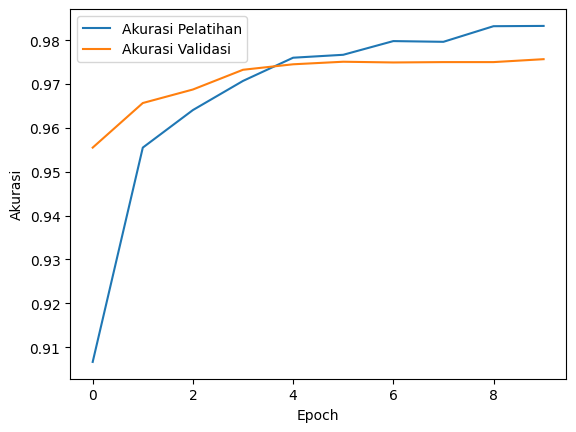

In [21]:
# Impor pustaka yang diperlukan
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Muat dan praproses dataset MNIST
(x_latih, y_latih), (x_tes, y_tes) = mnist.load_data()

# Normalisasi data agar bernilai antara 0 dan 1
x_latih = x_latih / 255.0
x_tes = x_tes / 255.0

# Ubah gambar 28x28 menjadi vektor ukuran 784
x_latih = x_latih.reshape(-1, 28*28)
x_tes = x_tes.reshape(-1, 28*28)

# Buat model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
history = model.fit(x_latih, y_latih, epochs=10, validation_split=0.2)

# Evaluasi model pada data tes
loss_tes, akurasi_tes = model.evaluate(x_tes, y_tes)
print(f'Akurasi pada data tes: {akurasi_tes * 100:.2f}%')

# Plot akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()


Impor library: TensorFlow digunakan untuk membuat model neural network, dan Matplotlib digunakan untuk memvisualisasikan hasil pelatihan.

Muat dan normalisasi data: Dataset MNIST berisi gambar hitam-putih 28x28 piksel dari angka 0-9. Data ini dimuat dengan fungsi mnist.load_data(). Setelah itu, setiap nilai piksel (berkisar 0-255) dinormalisasi menjadi antara 0 dan 1 dengan membaginya dengan 255.

Ubah bentuk data: Gambar 28x28 piksel diubah menjadi vektor satu dimensi berukuran 784, agar dapat diproses oleh layer input model.

Buat model: Model neural network dibuat dengan tiga layer:

Layer pertama: 128 neuron dengan fungsi aktivasi ReLU.
Layer dropout (mengurangi overfitting) dengan probabilitas 0.2.
Layer kedua: 64 neuron dengan aktivasi ReLU.
Layer terakhir: 10 neuron dengan aktivasi softmax, yang digunakan untuk prediksi kelas angka (0-9).
Kompilasi model: Model dikompilasi menggunakan optimizer Adam, fungsi loss sparse_categorical_crossentropy (karena ini masalah klasifikasi), dan metrik akurasi.

Latih model: Model dilatih pada data latih selama 10 epoch. Sebagian data (20%) digunakan sebagai data validasi untuk memantau kinerja model di luar data latih.

Evaluasi model: Setelah pelatihan, model diuji pada data tes, dan akurasi diperoleh untuk melihat seberapa baik model mengenali angka di luar data latih.

Visualisasi: Grafik dibuat untuk membandingkan akurasi pelatihan dan validasi selama 10 epoch